## What is HAR ?
- Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.
- Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting

## Why it is Importance
- Human activity recognition plays a significant role in human-to-human interaction and interpersonal relations.
- Because it provides information about the identity of a person, their personality, and psychological state, it is difficult to extract.
- The human ability to recognize another person’s activities is one of the main subjects of study of the scientific areas of computer vision and machine learning. As a result of this research, - - many applications, including video surveillance systems, human-computer interaction, and robotics for human behavior characterization, require a multiple activity recognition system.

### Importing Libraries

In [2]:
import glob
import random
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from tqdm import tqdm
from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

###  Setting and Load Data

In [3]:
train_df = pd.read_csv('../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv')
test_df = pd.read_csv('../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv')

In [4]:
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*")
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

### Data Understanding

In [5]:
train_df.shape,test_df.shape

((12600, 2), (5400, 1))

In [6]:
train_df.isna().sum(), test_df.isna().sum()

(filename    0
 label       0
 dtype: int64,
 filename    0
 dtype: int64)

In [7]:
train_df.label.value_counts()

,count
label,
sitting,840
using_laptop,840
hugging,840
sleeping,840
drinking,840
clapping,840
dancing,840
cycling,840
calling,840


In [8]:
train_df.label.nunique()

15

### Exploratory Data Analysis

In [9]:
import plotly.express as px
HAR = train_df.label.value_counts()
fig = px.pie(train_df, values=HAR.values, names=HAR.index,title="Label Distribution")
fig.show()

In [10]:
filename = train_df['filename']
labels = train_df['label']

In [11]:
def displaying_random():
    num = random.randint(1, 10000)
    image_filename =  f"Image_{num}.jpg"
    img_path = f"../input/human-action-recognition-har-dataset/Human Action Recognition/train/{image_filename}"
    imgg = img.imread(img_path)
    plt.imshow(imgg)
    plt.title("{}".format(train_df.loc[train_df['filename'] == "{}".format(image_filename), 'label'].item()))
    plt.axis('off')
    plt.show()

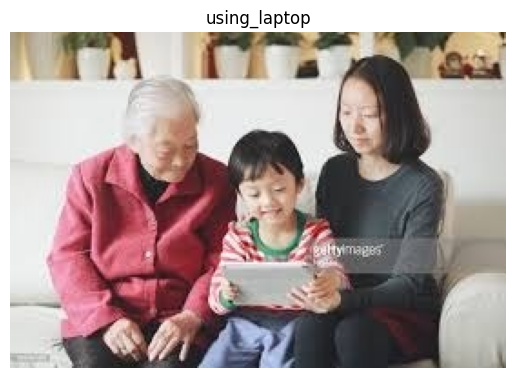

In [12]:
displaying_random()

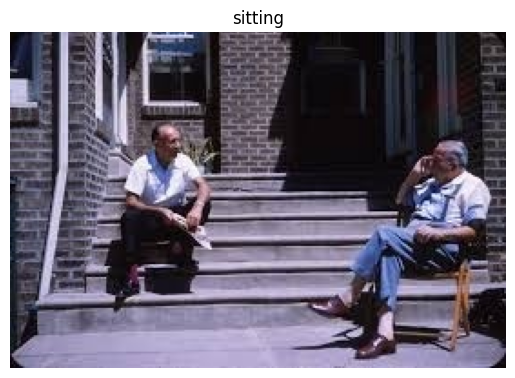

In [13]:
displaying_random()

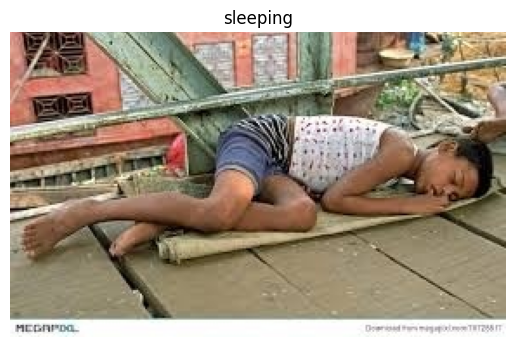

In [14]:
displaying_random()

In [15]:
image_data = []
image_label = []

for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + filename[i]
    imgg = Image.open(t)
    image_data.append(np.asarray(imgg.resize((160,160))))
    image_label.append(labels[i])

In [16]:
iii = image_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [17]:
y_train = to_categorical(np.asarray(train_df["label"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Model Creation and Training with Some Models

#### Efficient Net

In [28]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling ="avg",classes=15,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False


efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(15,activation="softmax"))

In [29]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


In [30]:
history_efficientnet_model = efficientnet_model.fit(iii,y_train,epochs=40)

Epoch 1/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 175s 230ms/step - accuracy: 0.5211 - loss: 1.5151

Epoch 2/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 131ms/step - accuracy: 0.7061 - loss: 0.9174

Epoch 3/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.7647 - loss: 0.7256

Epoch 4/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.8301 - loss: 0.5311

Epoch 5/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.8779 - loss: 0.3856

Epoch 6/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.9143 - loss: 0.2799

Epoch 7/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 129ms/step - accuracy: 0.9387 - loss: 0.2087

Epoch 8/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 51s 128ms/step - accuracy: 0.9556 - loss: 0.1524

Epoch 9/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 83s 130ms/step - accuracy: 0.9648 - loss: 0.1234

Epoch 10/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.9672 - loss: 0.1081

Epoch 11/40

394/394 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.9703 - loss: 0.10

#### VGG16

In [31]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(256, activation='relu'))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_vgg16 = vgg_model.fit(iii,y_train, epochs=60)

Epoch 1/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 48s 93ms/step - accuracy: 0.3785 - loss: 2.3864

Epoch 2/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 63s 69ms/step - accuracy: 0.5914 - loss: 1.2481

Epoch 3/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.6736 - loss: 0.9758

Epoch 4/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7589 - loss: 0.7473

Epoch 5/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.8237 - loss: 0.5497

Epoch 6/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.8635 - loss: 0.4068

Epoch 7/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9021 - loss: 0.2999

Epoch 8/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9267 - loss: 0.2267

Epoch 9/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9458 - loss: 0.1718

Epoch 10/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9493 - loss: 0.1528

Epoch 11/60

394/394 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9488 - loss: 0.1520

Epoch 12